<a href="https://colab.research.google.com/github/akhiltejareddy01/Data-Science-Case-Studies/blob/main/Recession_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import plotly.graph_objs as go
import plotly.io as pio
pio.templates.default = "plotly_white"

import bokeh as bk

# **Loading Dataset**

In [2]:
#loading csv file into a dataframe
data=pd.read_csv('/content/UK_monthly_gdp.csv')
data.head()

,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2


# **Exploratory Data Analysis**

<AxesSubplot:xlabel='GDP Growth', ylabel='Time Period'>

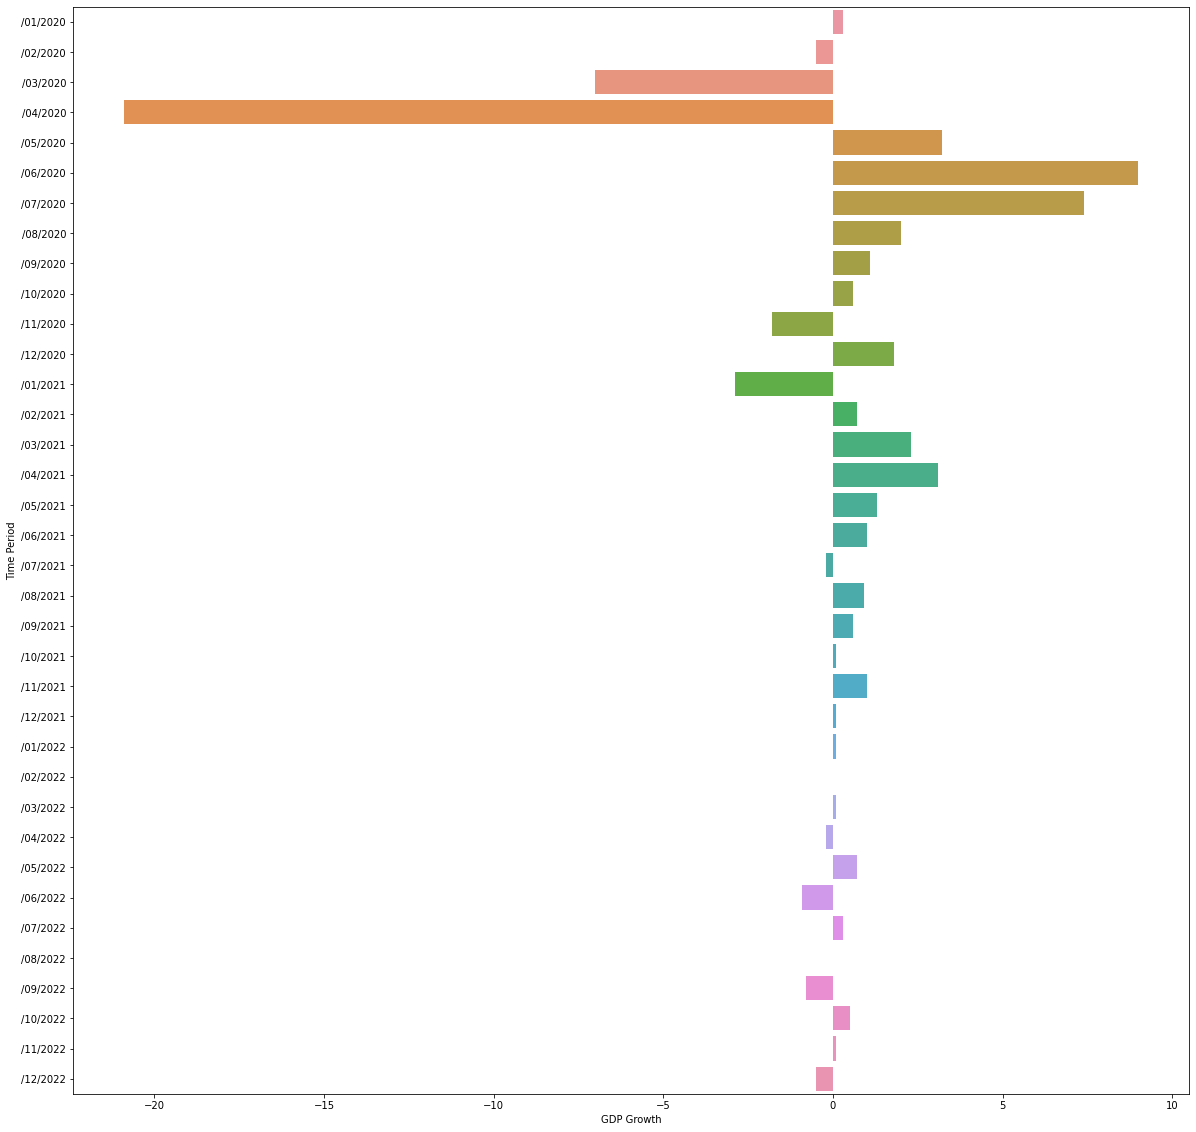

In [3]:
#visualizing the Dataset for better representation
plt.figure(figsize=(20,20))
sns.barplot(x=data['GDP Growth'],y=data['Time Period'])

**A recession is known as a weak or negative growth in real GDP (output) that is accompanied by a significant rise in the unemployment rate**

In [4]:
#gathering all negative GDP growth months
data_negative=data[data['GDP Growth']<0]
data_negative
#these are the possible months being hit by recession

,Time Period,GDP Growth
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
10,/11/2020,-1.8
12,/01/2021,-2.9
18,/07/2021,-0.2
27,/04/2022,-0.2
29,/06/2022,-0.9
32,/09/2022,-0.8
35,/12/2022,-0.5


In [5]:
data.dtypes

Time Period     object
GDP Growth     float64
dtype: object

**As a recession means the decline in the circulation of money for two consecutive quarters, I will convert our monthly data into quarterly data to analyze the recession**

In [6]:
#checking quarterly gdp growth
data['Time Period'] = pd.to_datetime(data['Time Period'], format='/%m/%Y')

data.set_index('Time Period', inplace=True)
quarterly_data = data.resample('Q').mean()
quarterly_data.head()


,GDP Growth
Time Period,
2020-03-31,-2.400000
2020-06-30,-2.900000
2020-09-30,3.500000
2020-12-31,0.200000
2021-03-31,0.033333


In [7]:
#plotting GDP growth
quarterly_data['recession']=((quarterly_data['GDP Growth']<0) & (quarterly_data['GDP Growth'].shift(1)<0))
quarterly_data

,GDP Growth,recession
Time Period,,
2020-03-31,-2.400000,False
2020-06-30,-2.900000,True
2020-09-30,3.500000,False
2020-12-31,0.200000,False
2021-03-31,0.033333,False
2021-06-30,1.800000,False
2021-09-30,0.433333,False
2021-12-31,0.400000,False
2022-03-31,0.066667,False


In [13]:
# Plot the GDP growth and recession data
fig = go.Figure()
fig.add_trace(go.Scatter(x=quarterly_data.index, 
                         y=quarterly_data['GDP Growth'], 
                         name='GDP Growth', 
                         line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=quarterly_data[quarterly_data['recession']].index, 
                         y=quarterly_data[quarterly_data['recession']]['GDP Growth'], 
                         name='Recession', line=dict(color='blue', width=2)))

fig.update_layout(title='GDP Growth and Recession over Time (Quarterly Data)',xaxis_title='Time Period')

fig.show()
           